HW1-1

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
name = 'Mose Gu'
ID= '2021712509'
print('first timestamp:',dateTimeObj)
print('Hello Professor Woo, my name is {0},{1}'.format(name,ID))
print('second timestamp:',dateTimeObj)


first timestamp: 2021-10-02 11:16:17.611049
Hello Professor Woo, my name is Mose Gu,2021712509
second timestamp: 2021-10-02 11:16:17.611049


# HW 4 

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/
!cp /content/gdrive/MyDrive/cats_and_dogs_small-hw.zip

MyDrive
cp: missing destination file operand after '/content/gdrive/MyDrive/cats_and_dogs_small-hw.zip'
Try 'cp --help' for more information.


gdrive/MyDrive/cats_and_dogs_small-hw.zip


In [ ]:
!unzip -o 'gdrive/MyDrive/cats_and_dogs_small-hw.zip'

Archive:  gdrive/MyDrive/cats_and_dogs_small-hw.zip
  inflating: cats_and_dogs_small/.DS_Store  
  inflating: cats_and_dogs_small/train/.DS_Store  
  inflating: cats_and_dogs_small/test/cats/cat.1986.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1927.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.826.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1937.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.770.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1980.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1958.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1957.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1964.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1941.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1988.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1994.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1944.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1924.jpg  
  inflating: cats_and_dogs_small/test/ca

In [ ]:
!ls 

cats_and_dogs_small  gdrive  sample_data


In [ ]:
from PIL import Image
 
image1 = Image.open('cats_and_dogs_small/test/cats/cat.1511.jpg')

image1.show()

imag1_size = image1.size

print(imag1_size)

(499, 375)


Model Develop

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
#가져온 데이터들로 데이터셋을 만드는 클래스
t_generator = ImageDataGenerator(rescale=1/255) #데이터 부풀리기 zoom_range=0.7, width_shift_range=0.3
#가져온 데이터를 리사이즈_ 64x64로 리사이즈해서 32개를 1개의 배치로 묶어 반환_generate
train_gen = t_generator.flow_from_directory('cats_and_dogs_small/train', target_size=(256,256), 
                                          batch_size=64, 
                                          class_mode='binary') 
# validation_gen = generator.flow_from_directory('catdog/cats_and_dogs_small/validation', target_size=(128,128),
#                                                batch_size=64,
#                                                class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
#가져온 데이터들로 데이터셋을 만드는 클래스
v_generator = ImageDataGenerator(rescale=1/255) #데이터 부풀리기 zoom_range=0.7, width_shift_range=0.3
#가져온 데이터를 리사이즈_ 64x64로 리사이즈해서 32개를 1개의 배치로 묶어 반환_generate
validation_gen = v_generator.flow_from_directory('cats_and_dogs_small/validation', target_size=(256,256),
                                               batch_size=64,
                                               class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
x_val, y_val = next(validation_gen)
print(x_val.shape)
print(y_val.shape)

(64, 256, 256, 3)
(64,)


In [ ]:
t_generator = ImageDataGenerator(rescale=1/255)
test_gen = t_generator.flow_from_directory('cats_and_dogs_small/validation', target_size=(256,256),
                                          batch_size=64,
                                          class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
x_batch, y_batch = next(train_gen)
print(x_batch.shape)
print(y_batch.shape)

(64, 256, 256, 3)
(64,)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# for i in range(len(x_batch)):
#     plt.imshow(x_batch[i])
#     plt.title(y_batch[i])
#     plt.show()

#cat = 0 dog = 1

In [ ]:
# x_batch.max()
y_batch
# x_batch.max()
# x_batch

array([1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.], dtype=float32)

In [ ]:
print(x_batch.shape)


(64, 256, 256, 3)


In [ ]:
from keras.layers import *
from keras.models import *

#create model with relu to resize and sigmoid to 0,1
def build_model():
    model = Sequential()
    x = Input(shape=(256, 256, 3))
    out = x

    out = Flatten()(out)
    out = Dense(512, activation='relu')(out)
    model.add(BatchNormalization())  
    out = Dense(256, activation='relu')(out)
    model.add(BatchNormalization())  
    out = Dense(128, activation='relu')(out)
    model.add(BatchNormalization())  
    out = Dense(64, activation = 'relu')(out)
    model.add(BatchNormalization())  
    out = Dense(1, activation='sigmoid')(out)

    model = Model(x, out)

    return model

In [ ]:
from tensorflow.keras import layers, models
from keras.models import *
# BatchNormalization, Dropout
# from tensorflow.keras import datasets, layers, models,BatchNormalization,Dropout
def deep_cnn_advanced():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), input_shape=(256, 256, 3),strides = (1,1)) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3),strides = (1,1)))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Activation('relu'))

    model.add(layers.Conv2D(64, (3, 3),strides = (1,1)))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Activation('relu'))

    model.add(layers.Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    # model.add(Conv2D(input_shape = (256, 256, 3), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(MaxPooling2D(pool_size = (2,2)))
    # model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(MaxPooling2D(pool_size = (2,2)))
    # model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(MaxPooling2D(pool_size = (2,2)))

    # # prior layer should be flattend to be connected to dense layers
    # model.add(Flatten())
    # # dense layer with 50 neurons
    # model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    # model.add(Dropout(0.5))
    # # final layer with 10 neurons to classify the instances
    # model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    # model.add(layers.Flatten())
    # model.add(layers.Dense(64, activation='relu'))
    # model.add(layers.Dense(10, activation='softmax'))

    return model

In [ ]:
# model = build_model()
model = deep_cnn_advanced()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

Model Train, update

In [ ]:
import numpy as np

x_tests, y_tests =[], []
for i in range(len(test_gen)):
  x_test, y_test = next(test_gen)
  x_tests.append(x_test)
  y_tests.append(y_test)

x_test = np.concatenate(x_tests,axis=0)
y_test = np.concatenate(y_tests,axis=0)

print(x_test.shape)
print(y_test.shape)

(1000, 256, 256, 3)
(1000,)


In [ ]:
print(train_gen[0][0].shape)
print(validation_gen[0][0].shape)

(64, 256, 256, 3)
(64, 256, 256, 3)


In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers
# opt = keras.optimizers.Adam(learning_rate = 0.025)

In [ ]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['binary_accuracy'])
history= model.fit(train_gen, batch_size =64, verbose =1, epochs=30, steps_per_epoch=len(train_gen), validation_data = validation_gen, validation_steps = len(validation_gen))

Epoch 1/30
32/32 [==============================] - 25s 395ms/step - loss: 1.2381 - binary_accuracy: 0.5385 - val_loss: 0.6977 - val_binary_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 11s 355ms/step - loss: 0.6568 - binary_accuracy: 0.5795 - val_loss: 0.7004 - val_binary_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 12s 360ms/step - loss: 0.6415 - binary_accuracy: 0.5980 - val_loss: 0.7036 - val_binary_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 12s 364ms/step - loss: 0.6269 - binary_accuracy: 0.6145 - val_loss: 0.6906 - val_binary_accuracy: 0.5770
Epoch 5/30
32/32 [==============================] - 12s 363ms/step - loss: 0.6188 - binary_accuracy: 0.6160 - val_loss: 0.6994 - val_binary_accuracy: 0.5010
Epoch 6/30
32/32 [==============================] - 12s 360ms/step - loss: 0.6012 - binary_accuracy: 0.6170 - val_loss: 0.6866 - val_binary_accuracy: 0.5230
Epoch 7/30
32/32 [==============================] - 12s 36

<function matplotlib.pyplot.show>

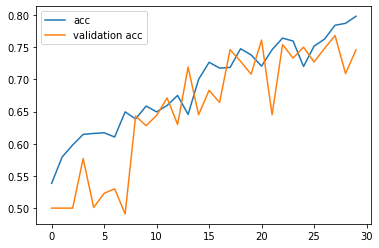

In [ ]:
accs= history.history['binary_accuracy']
valacc= history.history['val_binary_accuracy']

plt.plot(accs, label='acc')
plt.plot(valacc, label='validation acc')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

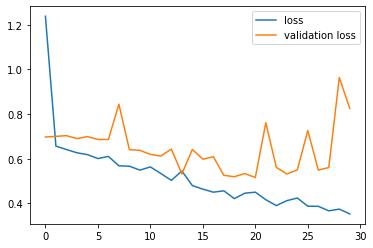

In [ ]:
losses = history.history['loss']
valloss= history.history['val_loss']

plt.plot(losses, label='loss')
plt.plot(valloss, label='validation loss')
plt.legend()
plt.show

test **data**

In [ ]:
tests_gen = v_generator.flow_from_directory('cats_and_dogs_small/test', target_size=(256,256),
                                               batch_size=64,
                                               class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(tests_gen)):
    x_test, y_test = next(tests_gen)
    x_tests.append(x_test)
    y_tests.append(y_test)

x_test = np.concatenate(x_tests, axis=0)
y_test = np.concatenate(y_tests, axis=0)

print(x_test.shape)
print(y_test.shape)

(1000, 256, 256, 3)
(1000,)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


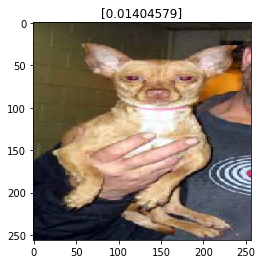

0: cat with accuracy:[0.01404579]%



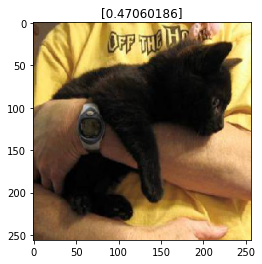

1: cat with accuracy:[0.47060186]%



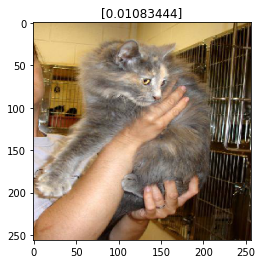

2: cat with accuracy:[0.01083444]%



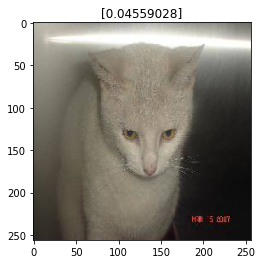

3: cat with accuracy:[0.04559028]%



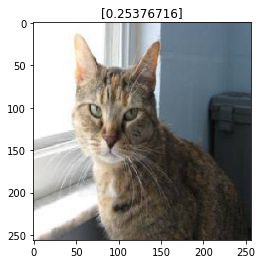

4: cat with accuracy:[0.25376716]%



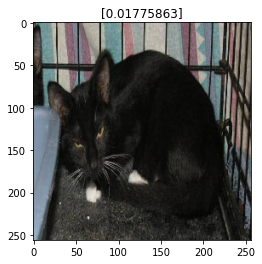

5: cat with accuracy:[0.01775863]%



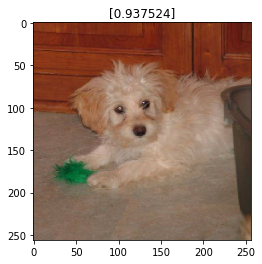

6: dog with accuracy:[0.937524]%



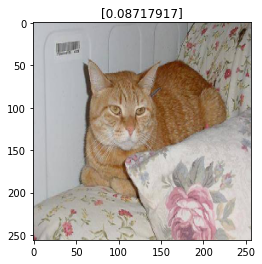

7: cat with accuracy:[0.08717917]%



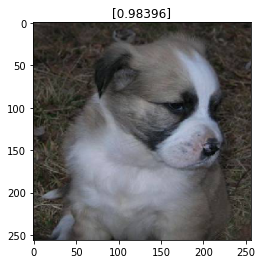

8: dog with accuracy:[0.98396]%



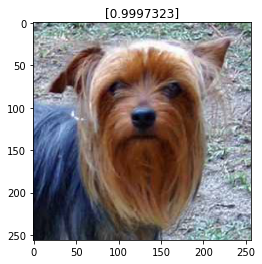

9: dog with accuracy:[0.9997323]%



In [ ]:
pred = model.predict(x_test[:10])
for index,i in enumerate(pred):
    if i < 0.5:
        plt.imshow(x_test[index])
        plt.title(pred[index])
        plt.show()
        print('{0}: cat with accuracy:{1}%\n'.format(index,i))

    else:
        plt.imshow(x_test[index])
        plt.title(pred[index])
        plt.show()
        print('{0}: dog with accuracy:{1}%\n'.format(index,i))


# for i in range(10):
#     plt.imshow(x_test[i])
#     plt.title(pred[i])
#     plt.show()


HW Q2. Use the following test image as an input for the binary classifier f you developed from Q1. Test with your own face image and report the result from the binary classifier f.

In [ ]:
!ls /content/gdrive/'MyDrive'
!cp /content/gdrive/'MyDrive'/testpic .

 cats_and_dogs_small		      Test
 cats_and_dogs_small-hw.zip	      testpic
'Colab Notebooks'		     'Untitled form (1).gform'
'How to get started with Drive.pdf'  'Untitled form.gform'
cp: -r not specified; omitting directory '/content/gdrive/MyDrive/testpic'


In [ ]:
!ls /content/gdrive/MyDrive/testpic/moses

구모세.jpg


In [ ]:
testpic_gen = v_generator.flow_from_directory('/content/gdrive/MyDrive/testpic/', target_size=(256,256),
                                               batch_size=64,
                                               class_mode='binary')


Found 2 images belonging to 2 classes.


In [ ]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(testpic_gen)):
    xx_test, yy_test = next(testpic_gen)
    x_tests.append(xx_test)
    y_tests.append(xx_test)

xx_test = np.concatenate(x_tests, axis=0)
yy_test = np.concatenate(y_tests, axis=0)

print(xx_test.shape)
print(yy_test.shape)

(2, 256, 256, 3)
(2, 256, 256, 3)


so... professor.Woo, you are close to dog by [0.9999926]%
so... Mose Gu, you are close to dog by [0.9994386]%


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


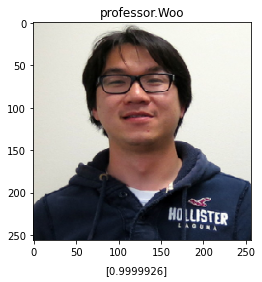

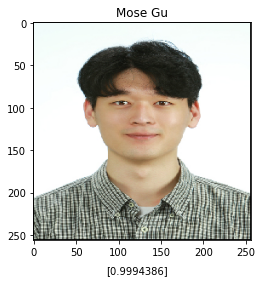

In [ ]:
pred = model.predict(xx_test[:2])
for index,i in enumerate(pred):
    name_list=['professor.Woo','Mose Gu']
    if i > 0.6:
        print("so... {0}, you are close to dog by {1}%".format(name_list[index],i))
    elif i < 0.4:
        print("so... {0}, you are close to cat by {1}%".format(name_list[index],i))
    else:
        print("so... {0}, you are not cat nor dog {1}%".format(name_list[index],i))

for i in range(2):
    name_list=['professor.Woo','Mose Gu']
    plt.imshow(xx_test[i])
    plt.title(name_list[i])
    plt.figtext(0.5, 0.01,pred[i],ha="center")
    plt.show()



**professor you have 66% accuracy of dog category and I got 59 that in range of svm

```
# 코드로 형식 지정됨
```

% accuracy of dog category!**

# HW 1-2

In [ ]:
!git clone https://github.com/aymericdamien/TensorFlow-Examples.git

Cloning into 'TensorFlow-Examples'...
remote: Enumerating objects: 1465, done.
remote: Total 1465 (delta 0), reused 0 (delta 0), pack-reused 1465
Receiving objects: 100% (1465/1465), 10.00 MiB | 16.46 MiB/s, done.
Resolving deltas: 100% (877/877), done.


In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.6 MB 32 kB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 3.2 MB 45.2 MB/s 
     |████████████████████████████████| 367 kB 48.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.13.1 which is incompatible.


In [ ]:
# from __future__ import division, print_function, absolute_import
# import sys
# import tensorflow as tf
# import numpy as np
# mnist = tf.keras.datasets.mnist

# import matplotlib.pyplot as plt

from __future__ import division, print_function, absolute_import

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
learning_rate = 0.001
num_steps = 2000
batch_size = 128


num_input = 784 
num_classes = 10 
dropout = 0.25 

In [ ]:
def conv_net(x_dict, n_classes, dropout, reuse, is_training):
    
    with tf.variable_scope('ConvNet', reuse=reuse):
        x = x_dict['images']

        x = tf.reshape(x, shape=[-1, 28, 28, 1])

        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

        conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)

        fc1 = tf.contrib.layers.flatten(conv2)

        fc1 = tf.layers.dense(fc1, 1024)
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)

        out = tf.layers.dense(fc1, n_classes)

    return out

In [ ]:
def model_fn(features, labels, mode):

    logits_train = conv_net(features, num_classes, dropout, reuse=False, is_training=True)
    logits_test = conv_net(features, num_classes, dropout, reuse=True, is_training=False)
    
    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 

    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())

    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [ ]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgmn0izqc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fca92961b10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)
# Train the Model
model.train(input_fn, steps=num_steps)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipeline

In [ ]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-09-13T15:50:10Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpgmn0izqc/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-09-13-15:50:15
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.99, global_step = 2000, loss = 0.0328346
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: /tmp/tmpgmn0izqc/model.ckpt-2000


{'accuracy': 0.99, 'global_step': 2000, 'loss': 0.0328346}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgmn0izqc/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


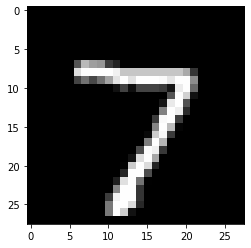

Model prediction: 7


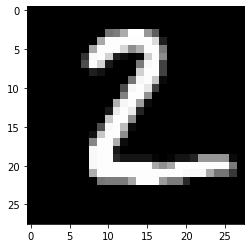

Model prediction: 2


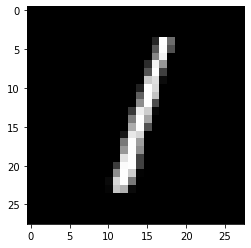

Model prediction: 1


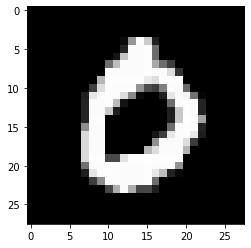

Model prediction: 0


In [ ]:
# Predict single images
n_images = 4
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])